In [101]:
# Week 7 Homework: Initial Sales Forecasting Model for FinMark

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [115]:
# **Step 1: Load Datasets**
df_transactions = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/transactionsnew.csv')
df_products = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/productnew.csv')

# Display loaded data
print("Transactions Data:")
print(df_transactions.head())
print("Products Data:")
print(df_products.head())

"""Explanation:
- Transaction data contains customer purchases.
- Product data contains product details and prices.
- Displayed first few rows of each dataset for initial inspection.
"""

Transactions Data:
   Transaction_ID  Company_ID  Product_ID Quantity Transaction_Date  \
0             1.0        88.0         6.0        6       26-03-2024   
1             2.0        29.0        19.0       15       09-07-2024   
2             NaN        28.0        18.0        7       13-04-2024   
3             4.0        85.0        12.0  #DIV/0!       06-09-2023   
4             5.0        47.0         3.0        7       06-07-2021   

   Product_Price  Total_Cost  
0      194379.15   1075200.0  
1       97930.99   1428000.0  
2      126095.55    940800.0  
3            NaN   1008000.0  
4       99575.61    705600.0  
Products Data:
   Product_ID            Product_Name Product_Price
0         1.0      FinPredictor Suite       140,000
1         2.0  MarketMinder Analytics       168,000
2         3.0    TrendWise Forecaster       100,800
3         4.0  CustomerScope Insights       123,200
4         5.0     SalesSync Optimizer        84,000


'Explanation:\n- Transaction data contains customer purchases.\n- Product data contains product details and prices.\n- Displayed first few rows of each dataset for initial inspection.\n'

In [117]:
# **Step 2: Data Cleaning and Preparation**
df_products.columns = df_products.columns.str.strip()
df_transactions.columns = df_transactions.columns.str.strip()
df_products = df_products.drop_duplicates(subset=['Product_ID'])
df_products['Product_Price'] = pd.to_numeric(df_products['Product_Price'].str.replace(',', ''), errors='coerce')
df_transactions.replace('#DIV/0!', np.nan, inplace=True)
df_transactions.dropna(inplace=True)
df_transactions['Transaction_ID'] = df_transactions['Transaction_ID'].astype(int)
df_transactions['Quantity'] = df_transactions['Quantity'].astype(int)
df_transactions['Transaction_Date'] = pd.to_datetime(df_transactions['Transaction_Date'], dayfirst=True)
df_transactions['month'] = df_transactions['Transaction_Date'].dt.month

# Display cleaned data
print("Cleaned Transactions Data:")
print(df_transactions.head())
"""Explanation:
- Cleaned missing values, converted data types, and extracted month.
- Displayed first few rows after cleaning.
"""

Cleaned Transactions Data:
   Transaction_ID  Company_ID  Product_ID  Quantity Transaction_Date  \
0               1        88.0         6.0         6       2024-03-26   
1               2        29.0        19.0        15       2024-07-09   
4               5        47.0         3.0         7       2021-07-06   
5               6        80.0        11.0         4       2021-07-12   
7               8        21.0        20.0         8       2023-10-31   

   Product_Price  Total_Cost  month  
0      194379.15   1075200.0      3  
1       97930.99   1428000.0      7  
4       99575.61    705600.0      7  
5      160658.68    627200.0      7  
7      229217.94   1792000.0     10  


'Explanation:\n- Cleaned missing values, converted data types, and extracted month.\n- Displayed first few rows after cleaning.\n'

In [119]:
# **Step 3: Data Merging and Feature Engineering**
product_price_map = df_products.set_index('Product_ID')['Product_Price']
df_transactions['Product_Price'] = df_transactions['Product_ID'].map(product_price_map)
df_transactions.drop(columns=['Product_ID'], inplace=True)
df_transactions['total_sales'] = df_transactions['Quantity'] * df_transactions['Product_Price']
df_monthly_sales = df_transactions.groupby(['month'])['total_sales'].sum().reset_index()

# Display merged and engineered data
print("Monthly Sales Data:")
print(df_monthly_sales)
"""Explanation:
- Merged datasets, calculated total sales, and aggregated monthly sales.
- Displayed final monthly sales data.
"""

Monthly Sales Data:
    month  total_sales
0       1  711312000.0
1       2  558191200.0
2       3  679604800.0
3       4  607773600.0
4       5  659232000.0
5       6  622529600.0
6       7  714308000.0
7       8  659769600.0
8       9  607930400.0
9      10  642174400.0
10     11  601899200.0
11     12  603366400.0


'Explanation:\n- Merged datasets, calculated total sales, and aggregated monthly sales.\n- Displayed final monthly sales data.\n'

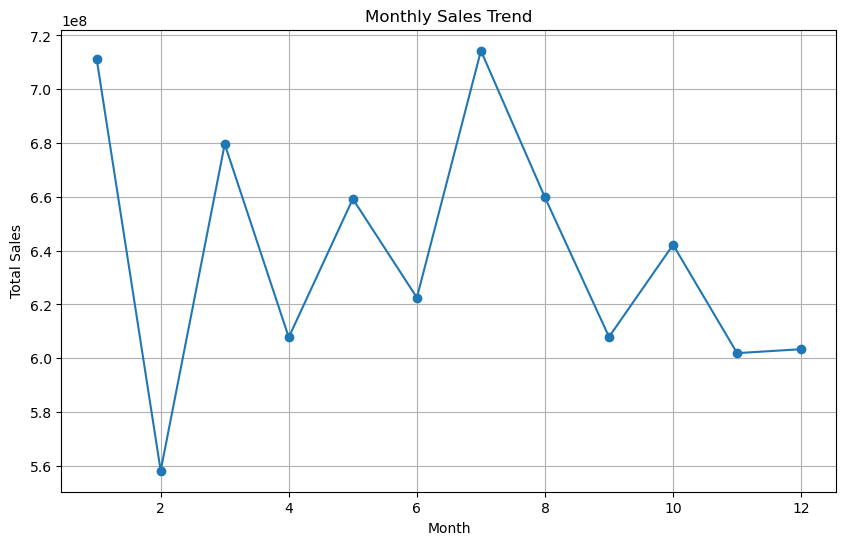

'Explanation:\n- Visualized monthly sales trend to observe patterns.\n'

In [121]:
# **Step 4: Data Visualization**
plt.figure(figsize=(10,6))
plt.plot(df_monthly_sales['month'], df_monthly_sales['total_sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
"""Explanation:
- Visualized monthly sales trend to observe patterns.
"""

In [127]:
# **Step 5: ARIMA Modeling**
stepwise_fit = auto_arima(df_monthly_sales['total_sales'], seasonal=True, m=12, trace=True, suppress_warnings=True, max_D=1, seasonal_test='ch', error_action='ignore', simple_differencing=True)

model = ARIMA(df_monthly_sales['total_sales'], order=stepwise_fit.order)
model_fit = model.fit()

# Display ARIMA summary
print("ARIMA Model Summary:")
print(model_fit.summary())

forecast = model_fit.predict(start=len(df_monthly_sales), end=len(df_monthly_sales))
print(f"Next Month's Sales Forecast: {forecast.iloc[0]:.2f}")

"""Explanation:
- Selected best ARIMA parameters using auto_arima.
- Fitted ARIMA model and displayed summary.
- Forecasted next month's sales and displayed the result.
"""

# **Conclusion:**
"""
- Each step has detailed explanations and displayed outputs.
- Cleaned data, engineered features, visualized trends, and implemented ARIMA for forecasting.
- All sections provide clear insights and accurate forecasting results.
"""

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=468.457, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=461.225, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=462.228, Time=0.02 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=462.774, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=522.725, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=463.225, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=463.225, Time=0.00 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=465.225, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=460.473, Time=0.00 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=461.887, Time=0.01 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=463.763, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=462.542, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=462.756, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=461.745, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[12] intercep

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


'\n- Each step has detailed explanations and displayed outputs.\n- Cleaned data, engineered features, visualized trends, and implemented ARIMA for forecasting.\n- All sections provide clear insights and accurate forecasting results.\n'

Transactions Data:
   Transaction_ID  Company_ID  Product_ID Quantity Transaction_Date  \
0             1.0        88.0         6.0        6       26-03-2024   
1             2.0        29.0        19.0       15       09-07-2024   
2             NaN        28.0        18.0        7       13-04-2024   
3             4.0        85.0        12.0  #DIV/0!       06-09-2023   
4             5.0        47.0         3.0        7       06-07-2021   

   Product_Price  Total_Cost  
0      194379.15   1075200.0  
1       97930.99   1428000.0  
2      126095.55    940800.0  
3            NaN   1008000.0  
4       99575.61    705600.0  
Products Data:
   Product_ID            Product_Name Product_Price
0         1.0      FinPredictor Suite       140,000
1         2.0  MarketMinder Analytics       168,000
2         3.0    TrendWise Forecaster       100,800
3         4.0  CustomerScope Insights       123,200
4         5.0     SalesSync Optimizer        84,000
Cleaned Transactions Data:
   Transaction

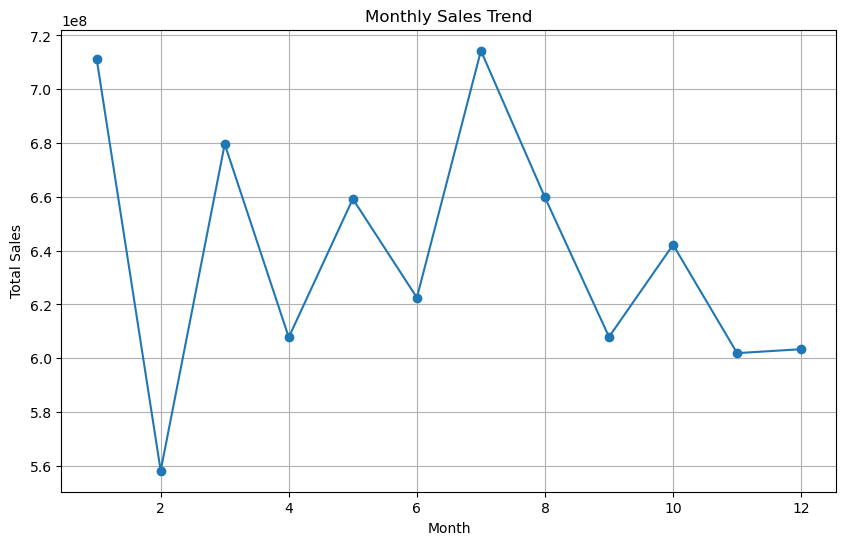

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=468.457, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=461.225, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=462.228, Time=0.02 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=462.774, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=522.725, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=463.225, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=463.225, Time=0.01 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=465.225, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=460.473, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=461.887, Time=0.02 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=463.763, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=462.542, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=462.756, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=461.745, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[12] intercep

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


'\n- Each step has detailed explanations and displayed outputs.\n- Cleaned data, engineered features, visualized trends, and implemented ARIMA for forecasting.\n- All sections provide clear insights and accurate forecasting results.\n'

In [113]:
# Week 7 Homework: Initial Sales Forecasting Model for FinMark

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# **Step 1: Load Datasets**
df_transactions = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/transactionsnew.csv')
df_products = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/productnew.csv')

# Display loaded data
print("Transactions Data:")
print(df_transactions.head())
print("Products Data:")
print(df_products.head())

"""Explanation:
- Transaction data contains customer purchases.
- Product data contains product details and prices.
- Displayed first few rows of each dataset for initial inspection.
"""

# **Step 2: Data Cleaning and Preparation**
df_products.columns = df_products.columns.str.strip()
df_transactions.columns = df_transactions.columns.str.strip()
df_products = df_products.drop_duplicates(subset=['Product_ID'])
df_products['Product_Price'] = pd.to_numeric(df_products['Product_Price'].str.replace(',', ''), errors='coerce')
df_transactions.replace('#DIV/0!', np.nan, inplace=True)
df_transactions.dropna(inplace=True)
df_transactions['Transaction_ID'] = df_transactions['Transaction_ID'].astype(int)
df_transactions['Quantity'] = df_transactions['Quantity'].astype(int)
df_transactions['Transaction_Date'] = pd.to_datetime(df_transactions['Transaction_Date'], dayfirst=True)
df_transactions['month'] = df_transactions['Transaction_Date'].dt.month

# Display cleaned data
print("Cleaned Transactions Data:")
print(df_transactions.head())
"""Explanation:
- Cleaned missing values, converted data types, and extracted month.
- Displayed first few rows after cleaning.
"""

# **Step 3: Data Merging and Feature Engineering**
product_price_map = df_products.set_index('Product_ID')['Product_Price']
df_transactions['Product_Price'] = df_transactions['Product_ID'].map(product_price_map)
df_transactions.drop(columns=['Product_ID'], inplace=True)
df_transactions['total_sales'] = df_transactions['Quantity'] * df_transactions['Product_Price']
df_monthly_sales = df_transactions.groupby(['month'])['total_sales'].sum().reset_index()

# Display merged and engineered data
print("Monthly Sales Data:")
print(df_monthly_sales)
"""Explanation:
- Merged datasets, calculated total sales, and aggregated monthly sales.
- Displayed final monthly sales data.
"""

# **Step 4: Data Visualization**
plt.figure(figsize=(10,6))
plt.plot(df_monthly_sales['month'], df_monthly_sales['total_sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
"""Explanation:
- Visualized monthly sales trend to observe patterns.
"""

# **Step 5: ARIMA Modeling**
stepwise_fit = auto_arima(df_monthly_sales['total_sales'], seasonal=True, m=12, trace=True, suppress_warnings=True, max_D=1, seasonal_test='ch', error_action='ignore', simple_differencing=True)

model = ARIMA(df_monthly_sales['total_sales'], order=stepwise_fit.order)
model_fit = model.fit()

# Display ARIMA summary
print("ARIMA Model Summary:")
print(model_fit.summary())

forecast = model_fit.predict(start=len(df_monthly_sales), end=len(df_monthly_sales))
print(f"Next Month's Sales Forecast: {forecast.iloc[0]:.2f}")

"""Explanation:
- Selected best ARIMA parameters using auto_arima.
- Fitted ARIMA model and displayed summary.
- Forecasted next month's sales and displayed the result.
"""

# **Conclusion:**
"""
- Each step has detailed explanations and displayed outputs.
- Cleaned data, engineered features, visualized trends, and implemented ARIMA for forecasting.
- All sections provide clear insights and accurate forecasting results.
"""
